## Korrelationen
Zeigt Korrelationen und Ausprägung der Korrelation zwischen Features des Datensets an.


### Alle Features
Zeigt Korrelationen zwischen allen Variablen / Features auf. (Big Picture)

<ipython-input-1-ad1638dd8fb3>:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(filtered_df.corr(), dtype=np.bool))


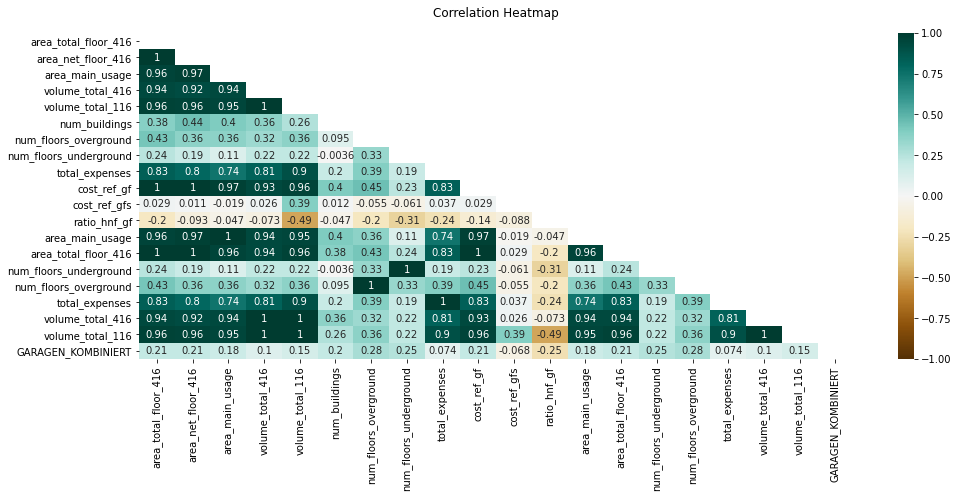

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import src.package.consts as c

import src.package.importer as imp
import src.package.importer_usages as imp_usg

plt.figure(figsize=(16, 6))

# import ans preprocess dataset
df = imp.get_extended_dataset('../package/datasets/full_dataset.csv')
df_usg, usage_types = imp_usg.extract_usage_details(df, highest_only=False, combine_garages=True)

features = [
            c.FIELD_AREA_MAIN_USAGE,
            c.FIELD_AREA_TOTAL_FLOOR_416,
            c.FIELD_USAGE_CLUSTER,
            # c.FIELD_NOM_USAGE_MAIN,
            c.FIELD_NUM_FLOORS_UNDERGROUND,
            c.FIELD_NUM_FLOORS_OVERGROUND,
            # c.FIELD_GARAGE_TYPE_UG,
            # c.FIELD_GARAGE_TYPE_OG,
            c.FIELD_TOTAL_EXPENSES,
            # c.PRIMARY_USAGE_PERCENTAGE,
            # c.SECONDARY_USAGE_PERCENTAGE,
            # c.TERTIARY_USAGE_PERCENTAGE,
            # c.QUATERNARY_USAGE_PERCENTAGE,
            c.FIELD_VOLUME_TOTAL_416,
            c.FIELD_VOLUME_TOTAL_116,

        ]

# features.extend(usage_types)
features.append(c.FIELD_GARAGE_COMBINED)

# select relevant features and preprocces plot
filtered_df = imp.select_relevant_features(df_usg, features)
mask = np.triu(np.ones_like(filtered_df.corr(), dtype=np.bool))

# prepare and plot heatmap
heatmap = sns.heatmap(filtered_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=16);

### Unabhängige & Abhängige Variablen
Zeigt Korrelation der unabhängigen Variablen mit der abhängigen Variable (HNF-GF Ratio).

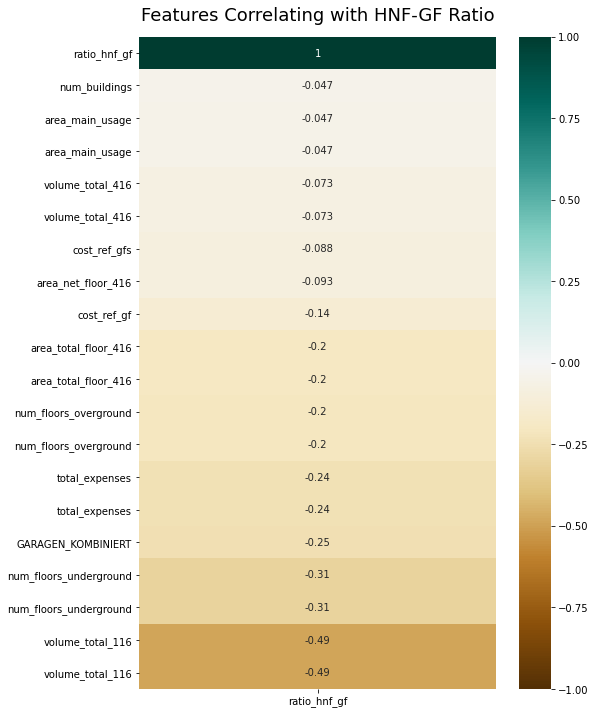

In [2]:
import src.package.consts as c

# preprocess dataset
cor_data = filtered_df.copy()
# cor_data = filtered_df[filtered_df[imp_usg.NOM_PRIMARY_USAGE].str.contains("WOHNBAUTEN", na=False)]
cor_data = cor_data.corr()[[c.FIELD_HNF_GF_RATIO]].sort_values(by=c.FIELD_HNF_GF_RATIO, ascending=False)

# plot heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(cor_data, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with HNF-GF Ratio', fontdict={'fontsize':18}, pad=16);

## Garagen

Hat eine vorhandene Garage eine Korrelation zur HNF-GF Ratio?
Plot zeigt Verteilung des ratios für Gebäude mit und ohne Garage (Indoor).

In [3]:
# preprocess data
filtered_df[c.GARAGE_INDOOR_PRESENT] = filtered_df[c.GARAGE_INDOOR_PRESENT].astype('category')
data = filtered_df[c.FIELD_HNF_GF_RATIO]

# plot data
gf = sns.catplot(x=c.GARAGE_INDOOR_PRESENT, y="ratio_hnf_gf", kind="box", data=filtered_df)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe data
data.groupby(filtered_df[c.GARAGE_INDOOR_PRESENT]).count()

AttributeError: module 'src.package.consts' has no attribute 'GARAGE_INDOOR_PRESENT'

In [ ]:
# preprocess data
filtered_df[c.GARAGE_OUTDOOR_PRESENT] = filtered_df[c.GARAGE_OUTDOOR_PRESENT].astype('category')
data = filtered_df[c.FIELD_HNF_GF_RATIO]

# plot data
gf = sns.catplot(x=c.GARAGE_OUTDOOR_PRESENT, y="ratio_hnf_gf", kind="box", data=filtered_df)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe data
data.groupby(filtered_df[c.GARAGE_OUTDOOR_PRESENT]).count()
